# Q1

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
df=pd.read_csv("BankLoanExam.csv")
df

,Name,Cust_ID,Income,Education,Age,Residence,Employ,saving,debt,credit card
0,Hans,101,100000.0,16.0,35.0,5.0,2.0,50000.0,1200.0,4100-6765-88765
1,yunhans,101,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,4100-6765-88766
2,yunhans,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4100-6765-88767
3,NaN,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4100-6765-88768
4,ouh EL,102,160000.0,18.0,40.0,10.0,8.0,500000.0,5400.0,4100-6765-88769
5,EL,102,NaN,NaN,NaN,NaN,NaN,10000.0,NaN,4100-6765-88770
6,perv,103,200000.0,18.0,55.0,2.0,5.0,1000000.0,1000.0,4100-6765-88771
7,Michelle,104,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN


In [50]:
df1=df.drop(['Name'],axis=1)
df1=df1.drop(['credit card'],axis=1)
df1

,Cust_ID,Income,Education,Age,Residence,Employ,saving,debt
0,101,100000.0,16.0,35.0,5.0,2.0,50000.0,1200.0
1,101,NaN,NaN,NaN,NaN,NaN,20000.0,NaN
2,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102,160000.0,18.0,40.0,10.0,8.0,500000.0,5400.0
5,102,NaN,NaN,NaN,NaN,NaN,10000.0,NaN
6,103,200000.0,18.0,55.0,2.0,5.0,1000000.0,1000.0
7,104,NaN,NaN,NaN,NaN,NaN,NaN,1000.0


In [51]:
df1.columns = df1.columns.str.strip()



In [59]:
#df1.groupby("Cust_ID")["Cust_ID"].count().reset_index(name="count")
#df1.groupby("Cust_ID")["Cust_ID"].count().transform(name="count")
#df_grouped = df1.groupby(["item", "color"]).agg(
#    count_col=pd.NamedAgg(column="color", aggfunc="count")
#)
df1['Counts'] = np.zeros(len(df1))
grp_df = df1.groupby("Cust_ID").count()
print(grp_df["Counts"])


Cust_ID
101    4
102    2
103    1
104    1
Name: Counts, dtype: int64


In [60]:
df1.fillna(0)
df1= df1.groupby("Cust_ID").sum()
df1

,Income,Education,Age,Residence,Employ,saving,debt,Counts
Cust_ID,,,,,,,,
101,100000.0,16.0,35.0,5.0,2.0,70000.0,1200.0,0.0
102,160000.0,18.0,40.0,10.0,8.0,510000.0,5400.0,0.0
103,200000.0,18.0,55.0,2.0,5.0,1000000.0,1000.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0


In [61]:
df1["Counts"]=grp_df["Counts"]
df1

,Income,Education,Age,Residence,Employ,saving,debt,Counts
Cust_ID,,,,,,,,
101,100000.0,16.0,35.0,5.0,2.0,70000.0,1200.0,4
102,160000.0,18.0,40.0,10.0,8.0,510000.0,5400.0,2
103,200000.0,18.0,55.0,2.0,5.0,1000000.0,1000.0,1
104,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1


In [62]:
top=df1["Income"].max()
top

200000.0

In [75]:
for i in df1.index:
    income=df1.loc[i,["Income"]].max()
    percentage=(income * 100)/top
    print(percentage)
    

50.0
80.0
100.0
0.0


In [76]:
df1.to_csv("NewBankLoanExam.csv")

# Q1 b

In [95]:
df_new=pd.read_csv("NewBankLoanExam.csv")
df_new

,Cust_ID,Income,Education,Age,Residence,Employ,saving,debt,Counts
0,101,100000.0,16.0,35.0,5.0,2.0,70000.0,1200.0,4
1,102,160000.0,18.0,40.0,10.0,8.0,510000.0,5400.0,2
2,103,200000.0,18.0,55.0,2.0,5.0,1000000.0,1000.0,1
3,104,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1


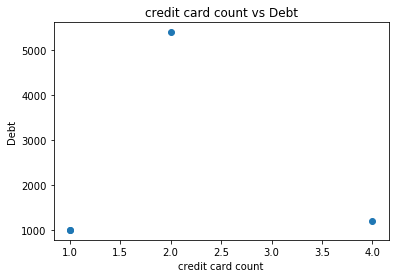

In [106]:
#fig, ax = plt.subplots(figsize=(10,10)) 
#ax.scatter(df['Counts'], df['debt'],label='credit card count vs Debt') # plot the data
#ax.set(xlabel='credit card count', ylabel='Debt')
#ax.grid()
#plt.show()

plt.scatter(df['Counts'], df['debt']) # plot the data
plt.title('credit card count vs Debt')
plt.xlabel('credit card count')
plt.ylabel('Debt')
plt.show()


# Q3

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d


dataset = pd.read_csv('wine.csv')
df = pd.DataFrame(dataset)
df

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [151]:
y = dataset.loc[:,'Cultivar'].values
x = StandardScaler().fit_transform(dataset.iloc[:,1:])

In [152]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [153]:
pca = PCA(n_components=6)
pc = pca.fit_transform(x)
print(pc)

[[ 3.31675081 -1.44346263 -0.16573904 -0.21563119  0.69304284 -0.22388013]
 [ 2.20946492  0.33339289 -2.02645737 -0.29135832 -0.25765463 -0.92712024]
 [ 2.51674015 -1.0311513   0.98281867  0.72490231 -0.25103312  0.54927605]
 ...
 [-2.67783946 -2.76089913 -0.94094188  0.31203475  1.271355    0.27306792]
 [-2.38701709 -2.29734668 -0.5506962  -0.68828455  0.81395522  1.17878298]
 [-3.20875816 -2.76891957  1.01391366  0.59690319 -0.89519259  0.29609218]]


In [154]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [125]:
print('Explained Variance ratio: ', pca.explained_variance_ratio_)
print('Explained Variance for ' + str(pca.n_components) + 
    ' principal components: ', pca.explained_variance_ratio_.sum())


Explained Variance ratio:  [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]
Explained Variance for 6 principal components:  0.8509811607477045


# Q3 b

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
import tensorflow as tf


dataset = pd.read_csv('wine.csv')
df = pd.DataFrame(dataset)
df

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [187]:
y = dataset.loc[:,'Cultivar'].values
x = dataset.iloc[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1, random_state = 42)


In [136]:
x_train.shape

(160, 13)

In [137]:
y_train.shape

(160,)

In [138]:
x_test.shape

(18, 13)

In [139]:
y_test.shape

(18,)

In [188]:
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

x_train = StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [189]:
# dimension reduction
pca = PCA(n_components=2)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [190]:
# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_shape=(x_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# run the model
model.fit(x_train, y_train, epochs=200, verbose=1)

# perform auto-evaluation
loss,accuracy = model.evaluate(x_test,y_test, verbose = 1)
print("loss=", loss)
print("accuracy=", accuracy)
    
# perform manual-evaluation
predictions = model.predict(x_test)
for i in np.arange(len(predictions)):
	print('Actual: ', y_test[i], 'Predicted: ', predictions[i])



Epoch 1/200
5/5 [==============================] - 0s 1ms/step - loss: 1.1983 - accuracy: 0.4437
Epoch 2/200
5/5 [==============================] - 0s 998us/step - loss: 1.0125 - accuracy: 0.7063
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8519 - accuracy: 0.8562
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7186 - accuracy: 0.9000
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.9125
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.9250
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.9438
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.9563
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.9563
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.9625
Epoch 11/200
5/5 [=========

5/5 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9625
Epoch 85/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9625
Epoch 86/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9625
Epoch 87/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9625
Epoch 88/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9625
Epoch 89/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9625
Epoch 90/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9625
Epoch 91/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9625
Epoch 92/200
5/5 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9625
Epoch 93/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9625
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9688
Epoch 167/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.9625
Epoch 168/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.9625
Epoch 169/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9625
Epoch 170/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9563
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9563
Epoch 172/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9625
Epoch 173/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9688
Epoch 174/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9688
Epoch 175/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9688
Epoch 176/200
5/5 [=====